# Tarea 1: Reconocimiento de Patrones en Minería de Datos


## Parte I: Análisis de rendimiento de distintos algoritmos de clustering

Ideas interesantes:
* Graficar siempre los clusters (colores) obtenidos.
* Utilizar un contraste de hipótesis para deteminar la mejor combinación de hiperparámetros.
* 8



In [1]:
import numpy as np
import sklearn.cluster as cl
import sklearn.metrics as mtr
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt
import skfuzzy.cluster as fuzzy

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Mouse Dataset

En esta sección se trabaja el dataset del ratón, cargando en principio los datos y visualizando la figura

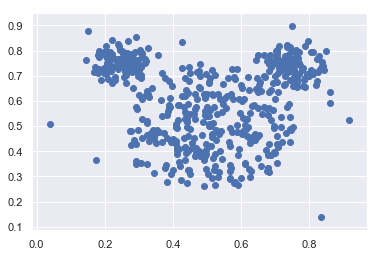

In [2]:
mouse_file = open('mouse.txt', 'r')
mouse = []
for line in mouse_file:
    point = line.strip().split("\t")
    mouse.append([float(point[0]), float(point[1])])

mouse = np.array(mouse)
plt.scatter(mouse[:,0], mouse[:,1])

En primera instancia y a simple vista se puede intuir que la cantidad de clusters a encontrar debiesen ser tres. Además es considerable una notable existencia de outliers a lo que correspondería al contorno del ratón, por lo que se puede anticipar que un algoritmo que debiese dar clusters que recuerden a una figura tipo "Mickey Mouse" ha de ser uno que sea robusto a outliers y que segmente en base a la densidad de puntos. Se anticipa que DBSCAN y Spectral debiesen ser, en teoría, los que entreguen los mejores resultados.

-------------------------------

### KMeans

Kmeans es sensible a outliers, por lo que, se anticipa que 

In [3]:
def errorKMeansMetric(iters):
    errors = []
    for x in range(1,iters):
        mouse_kMeans = cl.KMeans(n_clusters=x+1, random_state=0).fit(mouse)
        y_mouse_kMeans = mouse_kMeans.predict(mouse)
        errors.append(mtr.silhouette_score(mouse, y_mouse_kMeans))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorKMeansMetric, iters=widgets.IntSlider(min=2,max=20,step=1,value=5, continuous_update=False))


def renderKmeans(cluster):
    mouse_kMeans = cl.KMeans(n_clusters=cluster).fit(mouse)
    y_mouse_kMeans = mouse_kMeans.predict(mouse)
    mouse_kMeans_centers = mouse_kMeans.cluster_centers_

    plt.scatter(mouse[:, 0], mouse[:, 1], c=y_mouse_kMeans, s=50, cmap='plasma')
    plt.scatter(mouse_kMeans_centers[:, 0], mouse_kMeans_centers[:, 1], c='black', s=200, alpha=0.5);

    mouse_kMeans_scorer = mtr.silhouette_score(mouse, y_mouse_kMeans)
    print(mouse_kMeans_scorer)

interact(renderKmeans, cluster=widgets.IntSlider(min=2,max=20,step=1,value=3, continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', max=20, min=2), Output(…

interactive(children=(IntSlider(value=3, continuous_update=False, description='cluster', max=20, min=2), Outpu…

<function __main__.renderKmeans(cluster)>

In [4]:
def errorSingleAggloMetric(iters):
    errors = []
    for x in range(1,iters):
        mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = x+1, linkage='single').fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_sAgglo))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorSingleAggloMetric, iters=widgets.IntSlider(min=2,max=100,step=1,value=5, continuous_update=False))

def rederSingleAgglo(cluster):
    mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = cluster, linkage='single').fit_predict(mouse)

    plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_sAgglo, s=50, cmap='plasma')

    mouse_sAgglo_scorer = mtr.silhouette_score(mouse, mouse_sAgglo)
    print(mouse_sAgglo_scorer)
    
interact(rederSingleAgglo, cluster=widgets.IntSlider(min=2,max=100,step=1,value=2, continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', min=2), Output()), _dom…

interactive(children=(IntSlider(value=2, continuous_update=False, description='cluster', min=2), Output()), _d…

<function __main__.rederSingleAgglo(cluster)>

In [5]:
def errorCompleteAggloMetric(iters):
    errors = []
    for x in range(1,iters):
        mouse_sAgglo = cl.AgglomerativeClustering(n_clusters = x+1, linkage='complete').fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_sAgglo))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorCompleteAggloMetric, iters=widgets.IntSlider(min=2,max=30,step=1,value=5, continuous_update=False))

def rederCompleteAgglo(cluster):
    mouse_cAgglo = cl.AgglomerativeClustering(n_clusters = cluster, linkage='complete').fit_predict(mouse)

    plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_cAgglo, s=50, cmap='plasma')

    mouse_cAgglo_scorer = mtr.silhouette_score(mouse, mouse_cAgglo)
    print(mouse_cAgglo_scorer)
    
interact(rederCompleteAgglo, cluster=widgets.IntSlider(min=2,max=30,step=1,value=11, continuous_update=False))

interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', max=30, min=2), Output(…

interactive(children=(IntSlider(value=11, continuous_update=False, description='cluster', max=30, min=2), Outp…

<function __main__.rederCompleteAgglo(cluster)>

In [30]:
def errorDBSCANMetric(eps_val, samples):
    errors = []
    for x in np.arange(0.04,eps_val+0.01, 0.01):
        mouse_DBSCAN = cl.DBSCAN(eps=x, min_samples=samples).fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_DBSCAN))
    plt.plot(errors)
    
interact(errorDBSCANMetric, eps_val=widgets.FloatSlider(min=0.01,max=0.2,step=0.02,value=0.19, continuous_update=False), samples = widgets.IntSlider(min=20,max=100,step=1,value=5, continuous_update=False))

def renderDBSCAN(eps_val, samples):
    mouse_DBSCAN = cl.DBSCAN(eps=eps_val, min_samples=samples).fit_predict(mouse)

    plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_DBSCAN, s=50, cmap='plasma')

    mouse_DBSCAN_scorer = mtr.silhouette_score(mouse, mouse_DBSCAN)
    print(mouse_DBSCAN_scorer)
    
interact(renderDBSCAN, eps_val=widgets.FloatSlider(min=0.021,max=0.2,step=0.001,value=0.118, continuous_update=False), samples = widgets.IntSlider(min=20,max=100,step=1,value=65, continuous_update=False))

interactive(children=(FloatSlider(value=0.19, continuous_update=False, description='eps_val', max=0.2, min=0.0…

interactive(children=(FloatSlider(value=0.118, continuous_update=False, description='eps_val', max=0.2, min=0.…

<function __main__.renderDBSCAN(eps_val, samples)>

0.4596886911339167


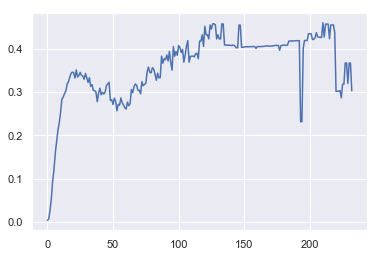

interactive(children=(FloatSlider(value=0.211, continuous_update=False, description='bw', max=0.234, min=0.01,…

<function __main__.renderMeanShift(bw)>

In [7]:
errors = []
for x in np.arange(0.001,0.234,0.001):
    mouse_MeanShift = cl.MeanShift(bandwidth=x).fit(mouse)
    y_mouse_MeanShift = mouse_MeanShift.predict(mouse)
    errors.append(mtr.silhouette_score(mouse, y_mouse_MeanShift))
plt.plot(errors)

print(np.amax(errors))
errors.index(0.4596886911339167)

def renderMeanShift(bw):
    mouse_MeanShift = cl.MeanShift(bandwidth=bw).fit(mouse)
    y_mouse_MeanShift = mouse_MeanShift.predict(mouse)
    mouse_MeanShift_centers = mouse_MeanShift.cluster_centers_

    plt.scatter(mouse[:, 0], mouse[:, 1], c=y_mouse_MeanShift, s=50, cmap='plasma')
    plt.scatter(mouse_MeanShift_centers[:, 0], mouse_MeanShift_centers[:, 1], c='black', s=200, alpha=0.5);

    mouse_MeanShift_scorer = mtr.silhouette_score(mouse, y_mouse_MeanShift)
    print(mouse_MeanShift_scorer)
    
interact(renderMeanShift, bw=widgets.FloatSlider(min=0.01,max=0.234,step=0.001,value=0.211, continuous_update=False))

In [8]:
def errorSpectralClusteringMetric(iters, aff, neighbors, gamma):
    errors = []
    for x in range(1,iters):
        mouse_SpectralClustering = cl.SpectralClustering(n_clusters = x+1, affinity=aff, n_neighbors=neighbors, gamma=gamma).fit_predict(mouse)
        errors.append(mtr.silhouette_score(mouse, mouse_SpectralClustering))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorSpectralClusteringMetric,
         iters=widgets.IntSlider(min=2,max=30,step=1,value=5, continuous_update=False),
         aff = ['rbf','nearest_neighbors'],
         neighbors =widgets.IntSlider(min=5,max=100,step=1,value=20, continuous_update=False),
         gamma= widgets.FloatSlider(min=-100.0,max=1000.0,step=10.5,value=100, continuous_update=False)
        )

def renderSpectralClustering(cluster, aff, neighbors, gamma):
    mouse_SpectralClustering = cl.SpectralClustering(n_clusters = cluster, affinity=aff, n_neighbors=neighbors, gamma=gamma).fit_predict(mouse)

    plt.scatter(mouse[:, 0], mouse[:, 1], c=mouse_SpectralClustering, s=50, cmap='plasma')

    mouse_SpectralClustering_scorer = mtr.silhouette_score(mouse, mouse_SpectralClustering)
    print(mouse_SpectralClustering_scorer)
    
interact(renderSpectralClustering,
         cluster=widgets.IntSlider(min=2,max=30,step=1,value=3, continuous_update=False),
         aff = ['rbf','nearest_neighbors'],
         neighbors =widgets.IntSlider(min=5,max=100,step=1,value=20, continuous_update=False),
         gamma= widgets.FloatSlider(min=-100.0,max=1000.0,step=10.5,value=57.5, continuous_update=False)
        )

interactive(children=(IntSlider(value=5, continuous_update=False, description='iters', max=30, min=2), Dropdow…

interactive(children=(IntSlider(value=3, continuous_update=False, description='cluster', max=30, min=2), Dropd…

<function __main__.renderSpectralClustering(cluster, aff, neighbors, gamma)>

In [21]:
def errorFuzzyMetric(iters):
    errors = []
    for x in range(1,iters):
        cntr, u, u0, d, jm, p, fpc = fuzzy.cmeans(mouse.T,k,5, error=0.005, maxiter=1000, init=None)
        cluster_membership = np.argmax(u, axis=0)
        errors.append(mtr.silhouette_score(mouse, cluster_membership))
    plt.plot(np.arange(2,iters+1), errors)
    
interact(errorKMeansMetric, iters=widgets.IntSlider(min=2,max=20,step=1,value=20, continuous_update=False))


def renderFuzzy(cluster):
    cntr, u, u0, d, jm, p, fpc = fuzzy.cmeans(mouse.T,k,5, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)

    plt.scatter(mouse[:, 0], mouse[:, 1], c=cluster_membership, s=50, cmap='plasma')
    plt.scatter(cntr[:, 0], cntr[:, 1], c='black', s=200, alpha=0.5);

    mouse_Fuzzy_scorer = mtr.silhouette_score(mouse, cluster_membership)
    print(mouse_Fuzzy_scorer)

interact(renderKmeans, cluster=widgets.IntSlider(min=2,max=20,step=1,value=3, continuous_update=False))

interactive(children=(IntSlider(value=20, continuous_update=False, description='iters', max=20, min=2), Output…

interactive(children=(IntSlider(value=3, continuous_update=False, description='cluster', max=20, min=2), Outpu…

<function __main__.renderKmeans(cluster)>